# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.ensemble import IsolationForest

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv(r"your_path_to_dataset\dataset.csv")

In [3]:
# print first 5 rows in the dataframe
ev.head()

,id,clusterId,connectionTime,Num.Rep.,disconnectTime,donechargingTime,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,...,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
0,5bc90cb9f9af8b0d7fe77cd2,39,"Wed, 25 Apr 2018 11:08:04 GMT",11.13,"Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",2.20,3.55,7.93,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,70.0,940
1,5bc90cb9f9af8b0d7fe77cd3,39,"Wed, 25 Apr 2018 13:45:10 GMT",13.75,"Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",11.19,3.55,10.01,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,45.0,250
2,5bc90cb9f9af8b0d7fe77cd4,39,"Wed, 25 Apr 2018 13:45:50 GMT",13.76,"Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",10.33,3.54,5.26,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,75.0,620
3,5bc90cb9f9af8b0d7fe77cd5,39,"Wed, 25 Apr 2018 14:37:06 GMT",14.62,"Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",9.31,3.55,5.18,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,74.0,560
4,5bc90cb9f9af8b0d7fe77cd6,39,"Wed, 25 Apr 2018 14:40:34 GMT",14.68,"Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",8.38,3.55,10.12,6.44,...,rain,24.37,34.85,13.54,300,9.9,0,1004.55,28.5,190


In [4]:
# print last 5 rows of the dataframe
ev.tail()

,id,clusterId,connectionTime,Num.Rep.,disconnectTime,donechargingTime,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,...,Precip Type,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
1194,9543932,39,2015-08-03 16:45:16,16.0,2015-08-03 19:58:16,2015-08-03 19:58:16,3.22,2.57,1.82,3.62,...,rain,35.98,40.55,10.35,305,16.1,0,1005.18,45.0,260
1195,9851741,39,2015-08-04 19:00:42,19.0,2015-08-04 20:31:07,2015-08-04 20:31:07,1.51,2.41,4.73,4.07,...,rain,35.98,40.55,10.35,305,16.1,0,1005.18,65.0,345
1196,4852971,39,2015-08-05 12:18:20,12.0,2015-08-05 15:35:08,2015-08-05 15:35:08,3.28,2.70,3.69,3.85,...,rain,35.98,40.55,10.35,305,17.3,0,1005.18,118.0,670
1197,6431779,39,2015-08-06 13:53:58,13.0,2015-08-06 15:47:07,2015-08-06 15:47:07,1.89,2.42,3.82,3.93,...,rain,35.98,40.55,10.35,305,17.3,0,1005.18,28.0,215
1198,7870286,39,2015-08-07 12:05:16,12.0,2015-08-07 15:02:08,2015-08-07 15:02:08,2.95,2.95,4.03,4.03,...,rain,35.98,40.55,10.35,305,17.3,0,1005.18,70.0,800


In [6]:
# getting some basic informations about the data
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1199 non-null   object 
 1   clusterId              1199 non-null   int64  
 2   connectionTime         1199 non-null   object 
 3   Num.Rep.               1199 non-null   float64
 4   disconnectTime         1199 non-null   object 
 5   donechargingTime       1198 non-null   object 
 6   SessionLength          1199 non-null   float64
 7   Avg.Sess.              1199 non-null   float64
 8   kWhDelivered           1199 non-null   float64
 9   Avg.Cons.              1199 non-null   float64
 10  sessionId              1199 non-null   object 
 11  siteId                 1199 non-null   int64  
 12  spaceID                1199 non-null   object 
 13  stationID              1199 non-null   object 
 14  timezone               1199 non-null   object 
 15  user

In [7]:
# checking the number of missing values
ev.isnull().sum()

id                          0
clusterId                   0
connectionTime              0
Num.Rep.                    0
disconnectTime              0
donechargingTime            1
SessionLength               0
Avg.Sess.                   0
kWhDelivered                0
Avg.Cons.                   0
sessionId                   0
siteId                      0
spaceID                     0
stationID                   0
timezone                    0
userID                   1199
userInput                1199
Precip Type                 0
temperature                 0
Avg. Humidity               0
Avg Wind Speed(mph)         0
Wind Bearing(degrees)       0
Visibility(km)              0
Loud Cover                  0
Pressure(millibar)          0
Battery_Pack Kwh            0
FastCharge_KmH              0
dtype: int64

In [8]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [9]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,1199
userInput,1199


In [10]:
ev.pop("userID")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userID, Length: 1199, dtype: float64

In [11]:
ev.pop("userInput")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userInput, Length: 1199, dtype: float64

In [12]:
ev.drop(['id','clusterId','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','donechargingTime','timezone','Precip Type','Loud Cover'],axis=1,inplace=True)

#How does data look matematically

In [14]:
#Are there duplicate values
ev.duplicated().sum()

0

In [15]:
#How is the correlation between columns
ev.corr()

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH
Num.Rep.,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,-0.005883,0.000890,0.082359,-0.102735,-0.177679,-0.118644,0.020703,0.008337
SessionLength,-0.071010,1.000000,0.380336,0.349359,0.288598,-0.315319,-0.303165,-0.081812,0.114141,0.003940,0.259002,-0.054652,-0.079983
Avg.Sess.,-0.107489,0.380336,1.000000,0.227223,0.773066,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,0.485590,-0.081316,-0.156699
kWhDelivered,-0.130661,0.349359,0.227223,1.000000,0.231452,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,0.249317,-0.026580,-0.006242
Avg.Cons.,-0.040154,0.288598,0.773066,0.231452,1.000000,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,0.415482,-0.032511,-0.099096
temperature,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,1.000000,0.850414,0.100510,-0.046195,0.259534,-0.574374,0.031727,0.119235
Avg. Humidity,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,0.850414,1.000000,0.396623,-0.181635,0.109862,-0.507359,0.019863,0.127938
Avg Wind Speed(mph),0.082359,-0.081812,-0.266609,-0.025725,-0.548857,0.100510,0.396623,1.000000,-0.256970,-0.121604,-0.133499,0.018198,0.020462
Wind Bearing(degrees),-0.102735,0.114141,0.276224,-0.099936,0.087399,-0.046195,-0.181635,-0.256970,1.000000,-0.049020,-0.112676,-0.056938,-0.071260
Visibility(km),-0.177679,0.003940,-0.143602,0.078063,-0.116635,0.259534,0.109862,-0.121604,-0.049020,1.000000,0.210063,0.057092,0.043039


In [16]:
correlation = ev.corr()

In [18]:
print(correlation['SessionLength'])

Num.Rep.                -0.071010
SessionLength            1.000000
Avg.Sess.                0.380336
kWhDelivered             0.349359
Avg.Cons.                0.288598
temperature             -0.315319
Avg. Humidity           -0.303165
Avg Wind Speed(mph)     -0.081812
Wind Bearing(degrees)    0.114141
Visibility(km)           0.003940
Pressure(millibar)       0.259002
Battery_Pack Kwh        -0.054652
FastCharge_KmH          -0.079983
Name: SessionLength, dtype: float64


In [20]:
print(correlation['kWhDelivered'])

Num.Rep.                -0.130661
SessionLength            0.349359
Avg.Sess.                0.227223
kWhDelivered             1.000000
Avg.Cons.                0.231452
temperature             -0.262378
Avg. Humidity           -0.233600
Avg Wind Speed(mph)     -0.025725
Wind Bearing(degrees)   -0.099936
Visibility(km)           0.078063
Pressure(millibar)       0.249317
Battery_Pack Kwh        -0.026580
FastCharge_KmH          -0.006242
Name: kWhDelivered, dtype: float64


In [22]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.04,max_features=1.0)
model.fit(ev[['SessionLength']])

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.04)

In [23]:
ev['newlength']=model.decision_function(ev[['SessionLength']])
ev['anomaly']=model.predict(ev[['SessionLength']])
ev.head(10)

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newlength,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.175811,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,-0.092278,-1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,-0.050799,-1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.039986,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.055645,1
5,14.73,10.56,3.54,7.91,6.44,24.37,34.85,13.54,300,9.9,1004.55,110.0,620,-0.068061,-1
6,14.80,3.67,3.54,15.29,6.44,24.37,34.85,13.54,300,9.9,1004.55,35.8,220,0.189018,1
7,14.97,4.13,3.53,6.95,6.43,24.37,34.85,13.54,300,9.9,1004.55,45.0,420,0.154993,1
8,15.18,3.08,3.53,2.17,6.43,24.37,34.85,13.54,300,9.9,1004.55,50.0,650,0.181602,1
9,15.20,3.29,3.52,2.44,6.43,24.37,34.85,13.54,300,9.9,1004.55,77.0,540,0.191064,1


In [24]:
outliers_counter = len(ev[ev['anomaly'] ==-1])
outliers_counter 

46

In [25]:
ev_data = ev[(ev['SessionLength'] <=13)]

In [26]:
ev_data

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newlength,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.175811,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,-0.092278,-1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,-0.050799,-1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.039986,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.055645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18,45.0,260,0.186973,1
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18,65.0,345,0.133278,1
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18,118.0,670,0.190102,1
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18,28.0,215,0.156760,1


In [27]:
selected_features = ['Avg.Sess.', 'Avg.Cons.', 'temperature', 'Avg. Humidity', 'Avg Wind Speed(mph)','Wind Bearing(degrees)','Visibility(km)','Pressure(millibar)','Battery_Pack Kwh','FastCharge_KmH','newlength','anomaly']

In [28]:
X = ev_data[selected_features]

In [29]:
X

,Avg.Sess.,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),Battery_Pack Kwh,FastCharge_KmH,newlength,anomaly
0,3.55,6.44,24.37,34.85,13.54,300,9.9,1004.55,70.0,940,0.175811,1
1,3.55,6.44,24.37,34.85,13.54,300,9.9,1004.55,45.0,250,-0.092278,-1
2,3.54,6.44,24.37,34.85,13.54,300,9.9,1004.55,75.0,620,-0.050799,-1
3,3.55,6.44,24.37,34.85,13.54,300,9.9,1004.55,74.0,560,0.039986,1
4,3.55,6.44,24.37,34.85,13.54,300,9.9,1004.55,28.5,190,0.055645,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2.57,3.62,35.98,40.55,10.35,305,16.1,1005.18,45.0,260,0.186973,1
1195,2.41,4.07,35.98,40.55,10.35,305,16.1,1005.18,65.0,345,0.133278,1
1196,2.70,3.85,35.98,40.55,10.35,305,17.3,1005.18,118.0,670,0.190102,1
1197,2.42,3.93,35.98,40.55,10.35,305,17.3,1005.18,28.0,215,0.156760,1


In [30]:
from sklearn.cluster import KMeans

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

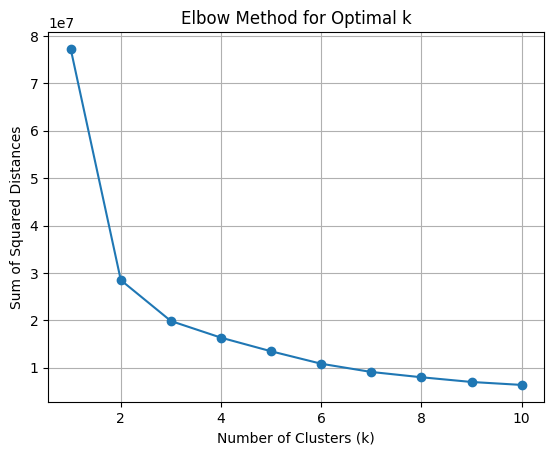

In [31]:
sse = []

# Try different values of k and compute the sum of squared distances
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [32]:
num_clusters = 2 # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(X)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
ev_data['cluster'] = clusters

C:\Users\Dell\AppData\Local\Temp\ipykernel_8736\2309874573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_data['cluster'] = clusters


#Splitting the features and target

In [34]:

Y = ev_data['SessionLength']

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(X)

StandardScaler()

In [37]:
standardized_data = scaler.transform(X)

In [38]:
print(standardized_data)

[[ 2.94729991  1.6182259  -1.97215983 ...  1.51983325  0.6399405
   0.17670002]
 [ 2.94729991  1.6182259  -1.97215983 ... -1.43995177 -3.74699428
  -5.65930895]
 [ 2.90241678  1.6182259  -1.97215983 ...  0.14717932 -3.06824339
  -5.65930895]
 ...
 [-0.86776554 -2.66068058  1.54925005 ...  0.3616565   0.87379478
   0.17670002]
 [-2.12449298 -2.52851358  1.54925005 ... -1.59008579  0.32818389
   0.17670002]
 [ 0.25431253 -2.36330484  1.54925005 ...  0.91929716  0.78286764
   0.17670002]]


In [39]:
X = standardized_data
Y = ev_data['SessionLength']

In [40]:
print(X)

[[ 2.94729991  1.6182259  -1.97215983 ...  1.51983325  0.6399405
   0.17670002]
 [ 2.94729991  1.6182259  -1.97215983 ... -1.43995177 -3.74699428
  -5.65930895]
 [ 2.90241678  1.6182259  -1.97215983 ...  0.14717932 -3.06824339
  -5.65930895]
 ...
 [-0.86776554 -2.66068058  1.54925005 ...  0.3616565   0.87379478
   0.17670002]
 [-2.12449298 -2.52851358  1.54925005 ... -1.59008579  0.32818389
   0.17670002]
 [ 0.25431253 -2.36330484  1.54925005 ...  0.91929716  0.78286764
   0.17670002]]


In [41]:
print(Y)

0        2.20
1       11.19
2       10.33
3        9.31
4        8.38
        ...  
1194     3.22
1195     1.51
1196     3.28
1197     1.89
1198     2.95
Name: SessionLength, Length: 1189, dtype: float64


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[ 3.3988  2.8387  2.193   1.9631  1.8033  3.3927  2.7439  2.4416  3.4105
  0.3505  3.7839  3.1806  3.1392  2.7353  2.7135  2.6679  2.7073  1.3053
  2.9402  2.2035  2.8797  3.5706  2.7068  5.1928  2.7738  2.7293  2.7012
  2.9575  2.801   2.4607  2.7924  3.2865  2.9221  0.986   2.3818  3.0077
  3.0612  1.9687  3.319   7.5878  2.763   3.4729  3.4735  6.1046  3.2877
  8.1449  2.7571  2.98    7.135   2.6571  0.9786  2.0816  3.1106  3.3338
  2.4517  3.0495  2.6557  3.3413  2.0326  2.8338  3.4205  1.504   2.8191
  1.5771  3.4232 10.3659  2.8496  2.7359  3.2247  7.6382  3.4671  4.2711
  1.3032  2.6574  2.7264  2.7732  3.3468  8.1686  1.076   6.5006  1.9469
  2.9545  2.6013  3.0431  2.9495  6.8259  5.678   2.4516  7.3645  2.0748
  2.8297  2.8085  2.9566  1.4919  2.8749  3.3529  7.4912  2.9203  8.2566
  3.9945  2.6215  2.6809  2.9304  1.8477  7.0542  1.4602  0.9891  0.6107
  3.0733  1.9693  3.5194  3.3294  7.6371  3.224   3.6117  3.6463  3.1951
  3.1692  3.2556  0.9326  8.5375  3.0933  2.8262  1

In [47]:
Y_test = list(Y_test)

In [49]:
#Training Scores
training_data_prediction = regressor.predict(X_train)

In [50]:
mean_absolute_error(Y_train, training_data_prediction)

0.2613919032597267

In [51]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.466414169407153

In [52]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9566688651943445


In [53]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [54]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  12.158335658070058


In [55]:
#Test Scores

In [56]:
mean_absolute_error(Y_test, test_data_prediction)

0.7526831932773109

In [57]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [58]:
print(rms)

1.2842311977380465


In [59]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.6686701051744615


In [61]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  26.408884745247512


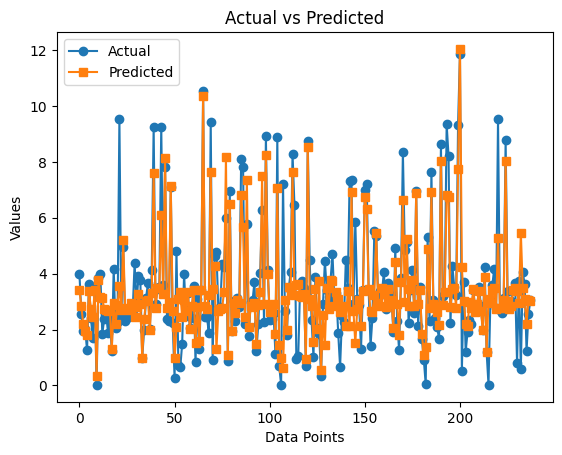

In [62]:
# Plotting the actual values
plt.plot(Y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test_data_prediction, label='Predicted', marker='s')

# Setting labels and title
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs Predicted")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

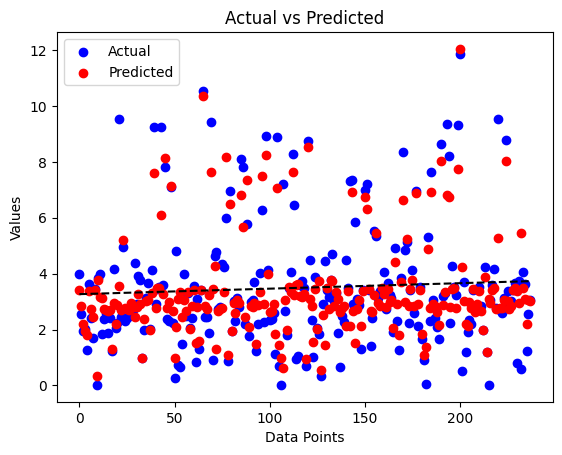

In [63]:
# Plotting the scatter plot
plt.scatter(range(len(Y_test)),Y_test, color='blue', label='Actual')
plt.scatter(range(len(test_data_prediction)), test_data_prediction, color='red', label='Predicted')

# Plotting the regression line
regression_line = np.polyfit(range(len(Y_test)), Y_test, 1)
plt.plot(range(len(Y_test)), np.polyval(regression_line, range(len(Y_test))), color='black', linestyle='--')

# Setting labels and title
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs Predicted")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

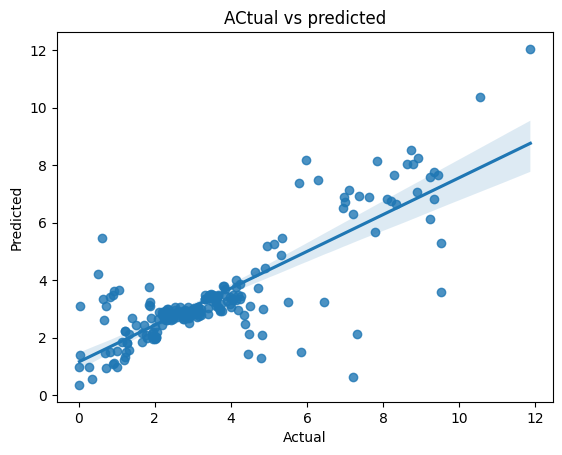

In [64]:
#Visualising
sns.regplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#SVM 

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [66]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [67]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [68]:
print(y_pred)

[ 2.62150648  2.76050546  3.68340195  2.02655486  1.73564095  3.56017397
  3.21325296  5.33898243  3.26366999  4.26058259  2.9478898   2.81087919
  2.7817075   2.73572526  2.81861728  2.3097757   2.85710421  1.53631032
  3.48086045  2.48341777  3.13074764  8.2671187   3.0263453   5.45931015
  3.31003261  3.00533762  3.13578694  3.09297584  3.32516436  2.22971785
  2.90269583  2.05458304  3.17701292  1.50559963  2.13375438  2.90737366
  2.9909983   2.14702603  3.28956089  8.49653894  3.21431282  3.05901111
  3.24726781  7.46102395  3.53018584  7.79902588  2.9869702   3.63394492
  8.05367814  3.28180966  3.26049996  5.6011872   3.67845389  1.16516913
  1.77020005  2.57621931  2.59890885  3.65624735  2.01414084  2.80803419
  3.03397256  1.6471804   2.92523303  1.70732566  2.91634081  9.68203822
  3.0051774   3.10315338  1.95556435  8.92391736  3.38266758  2.38756134
  3.8084114   3.05941216  3.71043661  1.83094686  3.2789108   8.21232087
  1.29020681  6.9974989   2.42735918  2.92850204  2

In [69]:
Y_test = list(Y_test)

In [71]:
mean_absolute_error(Y_test, y_pred)

0.918980154958053

In [72]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [73]:
print(rms)

1.3189365127689678


In [74]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.6505202848399511


In [75]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  31.041775739239025


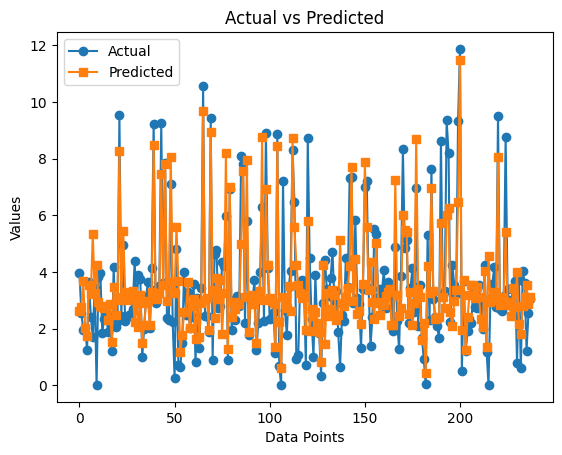

In [76]:
# Plotting the actual values
plt.plot(Y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(y_pred, label='Predicted', marker='s')

# Setting labels and title
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs Predicted")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

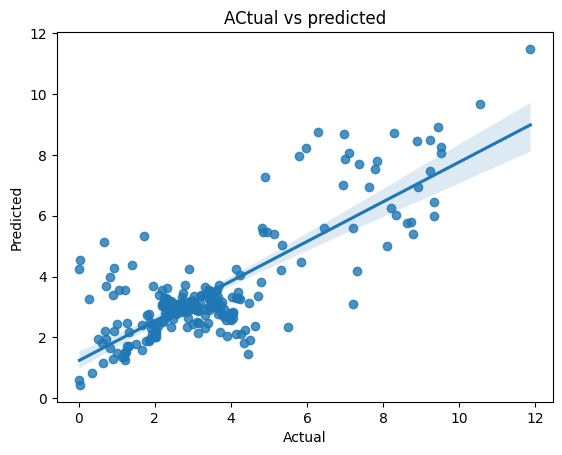

In [77]:
#Visualising
sns.regplot(x=Y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#XGB

In [78]:
# loading the model
xb_model = XGBRegressor(objective='reg:squarederror', alpha=0.5)

In [79]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [80]:
test_prediction = xb_model.predict(X_test)

In [81]:
print(test_prediction)

[ 3.0953114   3.4179726   1.9127024   2.1625814   1.3496805   3.4805348
  2.6465955   2.1300738   3.2119546   0.5661781   3.6620193   3.0219052
  3.6560526   2.686375    2.6961017   2.1800249   2.5916703   1.2206478
  2.161857    2.656722    2.770552    5.580329    2.7217665   4.809842
  2.6565025   2.4997568   2.7017      2.949554    3.0550187   2.4709232
  2.7189195   3.3410788   3.0201392   1.1328564   2.5256782   2.864068
  3.272258    2.0590801   3.6347842   9.408652    2.9763424   3.5903926
  3.4644277   6.165265    3.195861    8.487294    2.738966    2.81887
  8.607166    2.3617768   0.67301714  3.4102077   2.394519    3.036287
  2.8543315   2.747874    2.7049482   3.5012143   2.0801728   2.8394012
  3.6755996   2.1319742   2.916168    1.1337582   3.4872482   9.66423
  2.9249082   2.7684684   3.0685024   7.768773    3.8489277   4.748402
  0.61696744  2.8300073   2.7265255   2.865923    2.910267    7.699561
  1.0697603   6.9986634   1.937737    3.1157076   2.8674843   3.3326528
 

In [82]:
Y_test = list(Y_test)

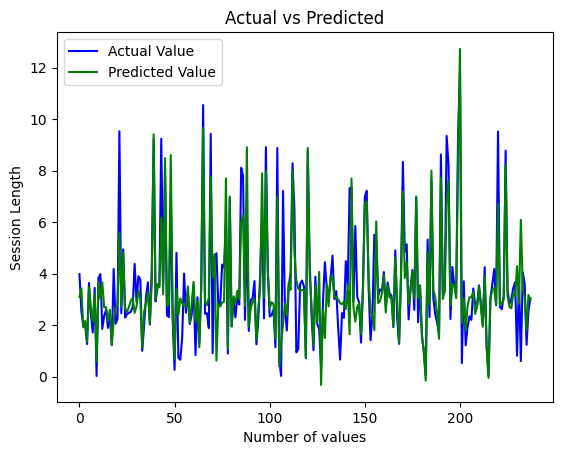

In [83]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Session Length')
plt.legend()
plt.show()

In [84]:
#Training Scores
training_data_prediction = xb_model.predict(X_train)

In [85]:
mean_absolute_error(Y_train, training_data_prediction)

0.060885761358572474

In [86]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.08399099288820527

In [87]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9985948521529158


In [88]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)


SMAPE score:  3.9408432916104434


In [89]:
#Test Scores

In [90]:
mean_absolute_error(Y_test, test_prediction)

0.7015380085610292

In [91]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [92]:
print(rms)

1.1889503702840651


In [93]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.7160109181662759


In [94]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  25.73470469266902


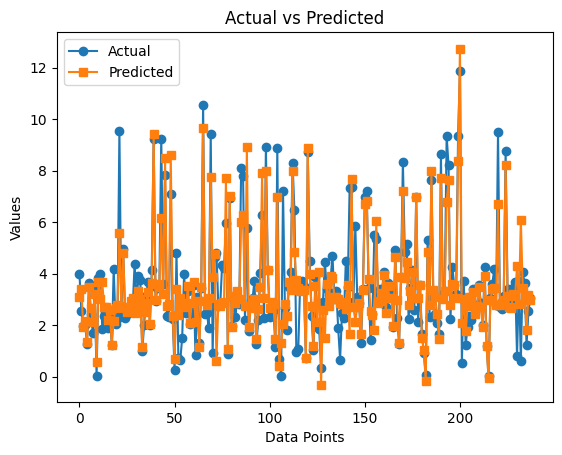

In [95]:
# Plotting the actual values
plt.plot(Y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(test_prediction, label='Predicted', marker='s')

# Setting labels and title
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs Predicted")

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

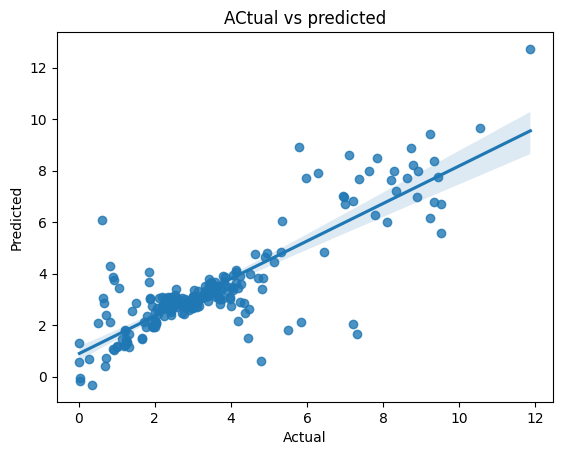

In [96]:
#Visualising
sns.regplot(x=Y_test, y=test_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

# Ensemble Learning

In [141]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [142]:
pred=stack_regressor.predict(X_test)

In [143]:
print(pred)

[ 3.26277238  2.83015518  2.14664537  1.9523485   1.94274181  3.40916641
  2.79881773  2.69279178  3.38627543  0.68260289  3.69690484  3.11974461
  3.51229067  2.71818476  2.71514336  2.73604798  2.73278025  1.31410787
  3.24527816  2.03429764  2.91524605  4.21782694  2.82763206  5.35257274
  2.91256953  2.79369985  2.74955721  2.95948834  2.82314167  2.22864575
  2.74422167  2.97216275  2.88282456  1.06052245  2.15183854  3.0440942
  3.0149867   1.96777384  3.43773427  8.20344095  2.83431842  3.4317258
  3.44394235  6.03495902  3.28394841  8.09112772  2.65675927  2.96707302
  7.37780986  2.71754872  1.38373342  2.38976265  3.42539002  3.18513121
  2.22604317  2.93918981  2.62965773  3.38528997  2.01690975  2.80299066
  3.39346293  1.39317252  2.89816179  1.50973264  3.386564   10.58872905
  2.94683503  2.90259902  3.22520698  7.77541819  3.16412996  3.8595025
  1.6186846   2.6773831   2.80971592  2.47719515  3.45000862  8.3249765
  1.22471086  6.3936636   1.97618062  2.9574434   2.600

In [144]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [145]:
mean_absolute_error(Y_train, training_data_prediction)

0.28266594887749497

In [146]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.49399701364979476

In [147]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9513922813041391


In [148]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 13.470299278695869


In [149]:
#Test Scores
mean_absolute_error(Y_test, pred)

0.7579286660800356

In [150]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [151]:
print(rms)

1.2368797271210956


In [152]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.6926528903139788


In [153]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 26.758389235085154


In [154]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('xb',xb_model),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xb',
                               XGBRegressor(alpha=0.5, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...)),
                              ('svm', SVR(C=10, gamma=0.1))])

In [155]:
predict_ed = stack_regressor.predict(X_test)

In [156]:
print(predict_ed)

[ 3.1622518   2.95130506  2.28757142  2.0067605   1.75539439  3.42435503
  2.82500726  2.62667142  3.33346159  0.83280808  3.64403391  3.10214969
  3.22898839  2.71107942  2.75552737  2.46151731  2.74157012  1.31462913
  2.86631141  2.32133481  2.88833367  4.71042922  2.79161556  5.20585149
  2.91740454  2.7420829   2.80265667  2.97930448  2.90423121  2.55689207
  2.70618485  3.16193548  2.95464006  1.03532402  2.2707429   2.98302121
  3.08285933  2.00445988  3.3939099   8.31434988  2.87038193  3.44478863
  3.43898283  6.56065267  3.19946287  8.16723769  2.74496938  2.96319004
  7.70728105  2.71472054  1.32851984  2.6871442   3.24255608  2.96378698
  2.40223563  2.93245451  2.69385726  3.40462843  2.03526217  2.83433759
  3.43509613  1.51232844  2.87318575  1.41759535  3.3789723   9.98122907
  2.86581424  2.84454278  3.2429204   7.83472578  3.32085367  4.1258641
  1.53703778  2.77254643  2.82202101  2.44055211  3.2240795   8.12085231
  1.05426698  6.57338206  2.03698379  3.00489908  2.

In [157]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [158]:
mean_absolute_error(Y_train, training_data_prediction)

0.25364288574941496

In [159]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.4343575174173468

In [160]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9624204758712539


In [161]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 12.110245112118417


In [207]:
#Test Scores
mean_absolute_error(Y_test, predict_ed)

0.7435460520107228

In [208]:
sqrt(mean_squared_error(Y_test, predict_ed))

1.2176713607535516

In [209]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_ed)
print("R squared error : ", error_score)

R squared error :  0.7021247814293399


In [210]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 26.09454593011365


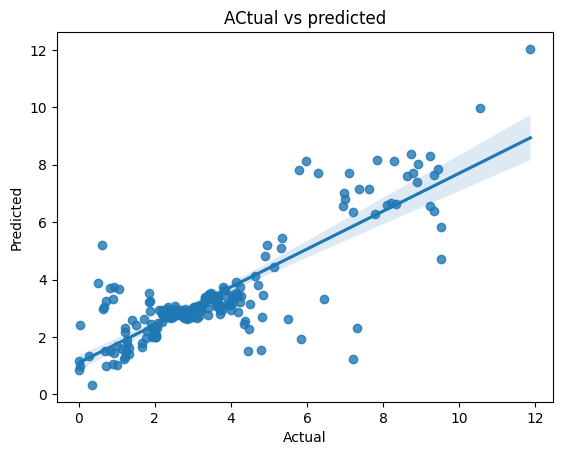

In [211]:
#Visualising
sns.regplot(x=Y_test, y=predict_ed)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

In [166]:
stack_regressor = StackingRegressor(estimators=[('xb',xb_model),('rf',regressor)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('xb',
                               XGBRegressor(alpha=0.5, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...)),
                              ('rf', RandomForestRegressor())])

In [167]:
spredict_ed = stack_regressor.predict(X_test)

In [168]:
print(spredict_ed)

[ 3.20995877  2.89525566  2.05237668  2.01832374  1.63699805  3.39738105
  2.69794579  2.49837027  3.35378529  0.3357386   3.78310955  3.06186392
  3.399748    2.76082123  2.72649651  2.59164163  2.69356912  1.30793287
  2.93005339  2.1991541   2.9244707   3.99090675  2.72322245  5.12563134
  2.90322824  2.64132819  2.7285033   2.96519331  2.83725207  2.36948483
  2.72818004  3.28143316  2.94380595  1.17899677  2.31081177  3.00816945
  3.10317536  2.03915453  3.1749124   7.67746395  2.82437392  3.47021222
  3.45555409  6.16841886  3.23613582  7.63472337  2.69317205  2.89743275
  7.35208365  2.61285315  0.95518483  2.35306205  3.04242527  3.49603218
  2.50632829  2.94010918  2.70802109  3.35695815  2.05784323  2.79412626
  3.4619476   1.45072841  2.91022582  1.47273277  3.42580887 10.18015489
  2.84105581  2.76031136  3.30294058  7.48927274  3.35999072  4.12886949
  1.40694957  2.68248764  2.73369519  2.64278515  3.25583788  8.09911475
  1.06432623  6.97504379  1.96152981  3.01477815  2

In [169]:
#Test Scores
mean_absolute_error(Y_test, spredict_ed)

0.7454836043284965

In [170]:
sqrt(mean_squared_error(Y_test, spredict_ed))

1.2507106620905604

In [171]:
# R squared error
error_score = metrics.r2_score(Y_test, spredict_ed)
print("R squared error : ", error_score)

R squared error :  0.6857408764550351


In [172]:
smape_score = smape(Y_test, spredict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 26.135283276153437


In [173]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [174]:
predict = vote_regressor.predict(X_test)

In [175]:
print(predict)

[ 2.97120324  2.79305273  2.88710098  2.00222743  1.82047047  3.48968698
  2.97402648  3.81919122  3.33128499  2.2099413   3.3691949   3.03713959
  3.13320375  2.73996263  2.79315864  2.46298785  2.80660211  1.43195516
  3.24883022  2.29450888  3.01377382  5.85270935  2.90732265  5.38365508
  3.1264163   2.91561881  2.97059347  3.00983792  3.07138218  2.33535892
  2.82994792  2.67514152  3.03105646  1.24349981  2.21447719  2.98208683
  3.03209915  2.05796302  3.35653045  8.26831947  3.01670641  3.27020556
  3.3524839   6.70241197  3.38039292  8.01011294  2.8700851   3.34062246
  7.63533907  3.00440483  1.98309998  3.6806436   3.53712694  2.29273457
  2.07520003  2.75140965  2.62250443  3.50272368  2.03357042  2.8447671
  3.24228628  1.5477902   2.90431652  1.65676283  3.1780204   9.99626911
  2.9589387   2.95117669  2.66838217  8.31060868  3.22208379  3.23243067
  2.6507057   2.87165608  3.2325683   2.25157343  3.3511554   8.14121044
  1.15185341  6.73044945  2.18602959  2.95325102  2.

In [176]:
#Train Scores
training_data_prediction = vote_regressor.predict(X_train)

In [177]:
mean_absolute_error(Y_train, training_data_prediction)

0.44096385841799124

In [178]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.7755554960417488

In [179]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8801929563878744


In [180]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 26.09454593011365


In [181]:
#Test Scores
mean_absolute_error(Y_test, predict)

0.8163753147287868

In [182]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [183]:
print(rms)

1.2009613522535998


In [184]:
# R squared error
error_score = metrics.r2_score(Y_test, predict)
print("R squared error : ", error_score)

R squared error :  0.7102441224769869


In [185]:
smape_score = smape(Y_test, predict)
print("SMAPE score:", smape_score)

SMAPE score: 28.52572997634695


In [186]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor),('xb',xb_model),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xb',
                             XGBRegressor(alpha=0.5, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, ...)),
                            ('svm', SVR(C=10, gamma=0.1))])

In [187]:
predict_ = vote_regressor.predict(X_test)

In [188]:
print(predict_)

[ 3.02310596  2.99015934  2.58086813  2.06007877  1.69727383  3.48516959
  2.84801615  3.28085207  3.30010819  1.72825356  3.45986968  2.99586146
  3.22962003  2.72136672  2.75010632  2.33073352  2.72452483  1.35258605
  2.90413911  2.41621328  2.92913319  5.68968255  2.81320392  5.17715075
  2.97497836  2.75196481  2.86592897  2.9800766   3.05822768  2.40861368
  2.76960512  2.8869206   3.03095071  1.20421867  2.33744418  2.9594139
  3.11068545  2.06866872  3.50291504  8.51163042  2.97928509  3.3767679
  3.39186517  6.53199634  3.33094898  7.99120669  2.80764539  3.12133833
  7.98851481  2.76402883  1.82977237  3.68596498  3.07525766  2.52321873
  2.27354385  2.76809778  2.67678568  3.50295387  2.04563787  2.85117848
  3.38412404  1.73128487  2.91170034  1.45696128  3.27529633  9.87348952
  2.93432852  2.88847392  2.77278892  8.10116348  3.52789844  3.75302115
  1.94759295  2.84360649  3.05972072  2.37828993  3.24252597  8.07792733
  1.14908904  6.86128744  2.11193206  3.00480323  2.7

In [189]:
#Train Scores
training_data_prediction = vote_regressor.predict(X_train)

In [190]:
mean_absolute_error(Y_train, training_data_prediction)

0.309527408802377

In [191]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.5344376962519376

In [192]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9431080580358352


In [193]:
smape_score = smape(Y_test, predict_ed)
print("SMAPE score:", smape_score)

SMAPE score: 26.09454593011365


In [194]:
#Test scores
mean_absolute_error(Y_test, predict_)

0.7542255283167384

In [195]:
sqrt(mean_squared_error(Y_test, predict_))

1.145857315621323

In [212]:
# R squared error
error_score = metrics.r2_score(Y_test, predict_)
print("R squared error : ", error_score)

R squared error :  0.7362240023704427


In [213]:
smape_score = smape(Y_test, predict_)
print("SMAPE score:", smape_score)

SMAPE score: 26.647339713054592


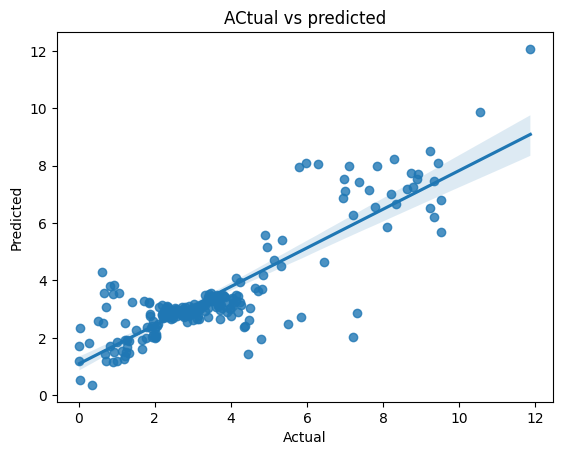

In [214]:
#Visualising
sns.regplot(x=Y_test, y=predict_)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

In [198]:
vote_regressor = VotingRegressor(estimators=[('xb',xb_model),('rf',regressor)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('xb',
                             XGBRegressor(alpha=0.5, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, ...)),
                            ('rf', RandomForestRegressor())])

In [199]:
vpredict_ = vote_regressor.predict(X_test)

In [200]:
print(vpredict_)

[ 3.2097057   3.15168628  2.01940122  2.06134072  1.68344027  3.4383174
  2.71294774  2.26873689  3.3036273   0.36038904  3.73580963  3.06895259
  3.65672629  2.69583745  2.72900083  2.42821243  2.70358514  1.27817391
  2.64677844  2.37271103  2.86312596  4.40046447  2.74753324  5.08742105
  2.74240124  2.66812841  2.70734999  2.94142698  2.95305933  2.48496159
  2.74610976  3.33673938  2.96721961  1.07472818  2.42218908  2.94353402
  3.13862902  2.01364006  3.50314211  8.71707615  2.88877122  3.53329629
  3.47111385  6.10573254  3.20923055  8.2138471   2.74638299  2.92063503
  7.88898315  2.56053841  1.02735857  2.72985387  2.86805955  3.23779353
  2.52631575  2.91308701  2.72897409  3.42380713  2.05678639  2.83115062
  3.56004979  1.79273711  2.89358399  1.25557909  3.46122409 10.07301517
  2.92225408  2.81368419  3.26865121  7.65598654  3.60256387  4.49395106
  1.03288372  2.79320366  2.71291277  2.75511146  3.09343356  7.95408056
  1.09838016  6.85648171  1.94546849  3.04490382  2.

In [201]:
#Test scores
mean_absolute_error(Y_test, vpredict_)

0.7150940422506016

In [204]:
sqrt(mean_squared_error(Y_test, vpredict_))

1.2148409160253788

In [205]:
# R squared error
error_score = metrics.r2_score(Y_test, vpredict_)
print("R squared error : ", error_score)

R squared error :  0.7035079780207087


In [206]:
smape_score = smape(Y_test, vpredict_)
print("SMAPE score:", smape_score)

SMAPE score: 25.714227810068476
